<a href="https://colab.research.google.com/github/akaicomet/NJOITOpenDataCenter-Pension-Record/blob/master/NJOITOpenDataCenter_Pension_Record_ModelBuilding_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas
!pip install tqdm
!pip install scikit-learn
!pip install sodapy
!pip install matplotlib
!pip install hyperopt
!pip install bayesian-optimization
!pip install tbvaccine 
!pip install MulticoreTSNE
!pip install -U -q PyDrive

    100% |████████████████████████████████| 61kB 4.6MB/s 
    100% |████████████████████████████████| 829kB 21.2MB/s 
  Stored in directory: /root/.cache/pip/wheels/0c/61/d2/d6b7317325828fbb39ee6ad559dbe4664d0896da4721bf379e
Successfully built future
spacy 2.0.18 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
google-colab 0.0.1a1 has requirement requests~=2.18.0, but you'll have requests 2.21.0 which is incompatible.
featuretools 0.4.1 has requirement pandas>=0.23.0, but you'll have pandas 0.22.0 which is incompatible.
cufflinks 0.14.6 has requirement plotly>=3.0.0, but you'll have plotly 1.12.12 which is incompatible.
  Found existing installation: requests 2.18.4
    Uninstalling requests-2.18.4:
      Successfully uninstalled requests-2.18.4
  Found existing installation: future 0.16.0
    Uninstalling future-0.16.0:
      Successfully uninstalled future-0.16.0


  Stored in directory: /root/.cache/pip/wheels/4b/60/a2/6eec4adc73341c1a2a653022b99ff8e1cb090684dba83be683
Successfully built bayesian-optimization
  Stored in directory: /root/.cache/pip/wheels/27/59/53/3b52ee63add3692254c30d687fa4dff4d128d0557861fb028e
Successfully built MulticoreTSNE
    100% |████████████████████████████████| 993kB 20.4MB/s 


#1. Copy python files from  GItHub repository to local

In [57]:
!git clone https://github.com/akaicomet/NJOITOpenDataCenter.git
!git clone https://github.com/akaicomet/akaicomet_Utility.git
!git clone https://github.com/akaicomet/akaicomet_Chart.git
!git clone https://github.com/akaicomet/akaicomet_ML.git

fatal: destination path 'NJOITOpenDataCenter' already exists and is not an empty directory.
fatal: destination path 'akaicomet_Utility' already exists and is not an empty directory.
Cloning into 'akaicomet_Chart'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 73 (delta 21), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (73/73), done.
Cloning into 'akaicomet_ML'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 174 (delta 12), reused 0 (delta 0), pack-reused 151
Receiving objects: 100% (174/174), 54.56 KiB | 6.06 MiB/s, done.
Resolving deltas: 100% (72/72), done.


#2. Run .py files in local

In [0]:
%run -i /content/akaicomet_Utility/ErrorHandling.py

%run -i /content/NJOITOpenDataCenter/YourMoneyActivePensionMembers.py 
%run -i /content/NJOITOpenDataCenter/YourMoneyRetiredPensionMembers.py
%run -i /content/NJOITOpenDataCenter/YourMoneyPensionMembersMerge.py

%run -i /content/akaicomet_Chart/X-Ray_Scan.py
%run -i /content/akaicomet_Chart/akaicomet_Chart.py

%run -i /content/akaicomet_ML/ML_Init.py
%run -i /content/akaicomet_ML/ML_Auto.py
%run -i /content/akaicomet_ML/AutoFeatureEngineering.py


#3. Import libraries

In [0]:
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
import random
from sodapy import Socrata
#from pandas.plotting import scatter_matrix
#from datetime import datetime
import seaborn as sb
from tqdm import tqdm
import warnings
from textwrap import wrap

In [0]:
from sklearn.externals import joblib
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


#4. YourMoney and the NJOIT Open Data Center 
##4.1 YourMoney Active Pension Members API

**Pension member data load from NJOIT** 

In [6]:
client = Socrata("data.nj.gov", None)
results = client.get("45bd-gwii", limit=100000000)#100000000

**Data Cleansing and Preparation for YourMoney Active Pension Members data**

In [0]:
ActivePension_df = ActivePensionDataWrangler(results)

##4.2 YourMoney Retired Pension Members API
**Pension payment member data load from NJOIT**

In [0]:
results = client.get("8up4-62p6",   limit=100000000)

**Data Cleansing and Preparation for YourMoney Retired Pension data**

In [0]:
RetiredPension_df_grped = RetiredPensionMembersDataWrangler(results)

**Merge YourMoney Active Pension Members data and YourMoney Retired Pension data**

In [0]:
ActivePension_df = PensionMembersMerge(ActivePension_df,RetiredPension_df_grped)
del results

## 5 Recheck  Correlation Variable Validation:

In [11]:
#x_cols2 = ['_20_year_status',	'all_employers_salary_amt',		'employer_freq_pensioned', 'total_months_qty',	'location_freq_pensioned',		'current_employer_salary_rollingamt', 	'service_months_qty',	'pension_freq_pensioned', 'pension_fund_name_enc', 'pension_group_name_enc' ]
x_cols2 = ['_20_year_status','all_employers_salary_amt','employer_freq_pensioned','total_months_qty','location_freq_pensioned','service_months_qty','pension_freq_pensioned','pension_fund_name_enc','pension_group_name_enc' ]
ActivePension_df[x_cols2].corr()

,_20_year_status,all_employers_salary_amt,employer_freq_pensioned,total_months_qty,location_freq_pensioned,service_months_qty,pension_freq_pensioned,pension_fund_name_enc,pension_group_name_enc
_20_year_status,1.000000,0.295118,-0.074679,0.844411,0.082618,-0.002429,0.091064,-0.238068,-0.113550
all_employers_salary_amt,0.295118,1.000000,-0.066198,0.395345,-0.030279,-0.027708,-0.439474,0.207998,0.097105
employer_freq_pensioned,-0.074679,-0.066198,1.000000,-0.065524,0.187599,0.026186,0.040389,0.099662,-0.033238
total_months_qty,0.844411,0.395345,-0.065524,1.000000,0.067168,0.000102,0.047303,-0.187378,-0.121364
location_freq_pensioned,0.082618,-0.030279,0.187599,0.067168,1.000000,0.056022,0.308507,0.047458,-0.063150
service_months_qty,-0.002429,-0.027708,0.026186,0.000102,0.056022,1.000000,0.079330,0.052583,-0.034342
pension_freq_pensioned,0.091064,-0.439474,0.040389,0.047303,0.308507,0.079330,1.000000,-0.306339,-0.308736
pension_fund_name_enc,-0.238068,0.207998,0.099662,-0.187378,0.047458,0.052583,-0.306339,1.000000,0.185796
pension_group_name_enc,-0.113550,0.097105,-0.033238,-0.121364,-0.063150,-0.034342,-0.308736,0.185796,1.000000


# 6 Load clfs Data from Google Drive

In [0]:
#Need to change 'id' everytime

downloaded = drive.CreateFile({'id':'1z_loeB0yA9pjlZUpS562WBlowfAn0-1d'})
downloaded.GetContentFile('clfs624.pkl')

downloaded = drive.CreateFile({'id':'1u1hj69_nk179-7UrXTHFC8AOprl_38v8'})
downloaded.GetContentFile('clfs_score624.pkl')

In [0]:
clfs = joblib.load('clfs624.pkl')
clfs_score = joblib.load('clfs_score624.pkl')

In [0]:
df_clfs_score = pd.DataFrame.from_dict(clfs_score,orient='index')
df_clfs_score = df_clfs_score[~df_clfs_score.duplicated()]

In [0]:
df_clfs_score['classifier'] = [i.split('|')[0] for i  in df_clfs_score.index.tolist()]

In [0]:
df_clfs_score['std'] = df_clfs_score.std(axis=1)

In [0]:
df_clfs_score.columns = ['Training', 'Test1', 'Test2', 'classifier','std']
df_clfs_score = df_clfs_score[df_clfs_score['Training']  > 0.8]

In [0]:
df_clfs_score['rank'] = df_clfs_score.sort_values(['classifier','std','Training'], ascending=[True, True, True]).groupby('classifier')['std'].cumcount()

In [56]:
df_clfs_score[df_clfs_score['rank']  < 11].sort_values(['classifier','rank'], ascending=[True, True])

,Training,Test1,Test2,classifier,std,rank
AdaBoostClassifier|Raw Normalizer_l2|,0.939714,0.938000,0.938667,AdaBoostClassifier,0.000864,0
AdaBoostClassifier|PCA StandardScalerMTST|StandardScalerMFST|,0.939714,0.938000,0.939333,AdaBoostClassifier,0.000900,1
AdaBoostClassifier|PCA PowerTransformer_std|PowerTransformer|,0.916000,0.914667,0.914000,AdaBoostClassifier,0.001018,2
AdaBoostClassifier|PCA StandardScalerMFST|StandardScalerMFSF|,0.939429,0.938000,0.940000,AdaBoostClassifier,0.001030,3
AdaBoostClassifier|Raw StandardScalerMTST|StandardScalerMTSF|,0.941714,0.940000,0.943333,AdaBoostClassifier,0.001667,4
AdaBoostClassifier|Raw QuantileTransformer_u|,0.941429,0.939333,0.942667,AdaBoostClassifier,0.001685,5
AdaBoostClassifier|PCA StandardScalerMTST|StandardScalerMTSF|,0.939714,0.936667,0.940000,AdaBoostClassifier,0.001848,6
AdaBoostClassifier|Raw StandardScalerMTST|StandardScalerMFST|,0.942857,0.940667,0.944667,AdaBoostClassifier,0.002003,7
AdaBoostClassifier|Raw StandardScalerMTSF|StandardScalerMFSF|,0.943143,0.941333,0.945333,AdaBoostClassifier,0.002003,8
AdaBoostClassifier|PCA StandardScalerMTST|,0.937714,0.936000,0.940000,AdaBoostClassifier,0.002007,9


In [62]:
y_train = ActivePension_df['IsPensionPaid']
X_train = ActivePension_df[x_cols2]

X_train = X_train.astype(float)

clfs = dict()
clfs_score = dict()

scaling_def = {'QuantileTransformer_n':QuantileTransformer(output_distribution='normal')}
redemensioning_def = {'PCA': PCA(n_components=0.99, svd_solver='full')}

for data in map(lambda x:Redimensioning2(x[1],x[0],redemensioning_def), scaling3(X_train,scaling_def)):
  for x in data:
    MLModelBuilding('RandomForestClassifier', x[1], x[0], y_train, 0.3, clfs, [0.1, 1],clfs_score)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Train score: 0.9902523933855527
Test score: 0.9549753408761241
Test2 score: 0.9802727008993327
RandomForestClassifier|PCA QuantileTransformer_n|



In [66]:
clfs = {}
clfs_score = dict()

scaling_def = {'QuantileTransformer_n':QuantileTransformer(output_distribution='normal')}
redemensioning_def = {'PCA': PCA(n_components=0.99, svd_solver='full')}

for i in range(0,10):
  y_train = ActivePension_df.sample(n=10000, random_state=i)['IsPensionPaid'].as_matrix()
  X_train = ActivePension_df[x_cols2].sample(n=10000, random_state=i)

  X_train = X_train.astype(float)

  for data in map(lambda x:Redimensioning2(x[1],x[0],redemensioning_def), scaling3(X_train,scaling_def)):
    for x in data:
      MLModelBuilding('RandomForestClassifier', x[1], x[0], y_train, 0.3, clfs, [0.1, 1],clfs_score)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Train score: 0.989
Test score: 0.9466666666666667
Test2 score: 0.9743333333333334
RandomForestClassifier|PCA QuantileTransformer_n|



/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Train score: 0.9865714285714285
Test score: 0.9426666666666667
Test2 score: 0.974
RandomForestClassifier|PCA QuantileTransformer_n|



/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Train score: 0.9897142857142858
Test score: 0.9406666666666667
Test2 score: 0.9686666666666667
RandomForestClassifier|PCA QuantileTransformer_n|



/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Train score: 0.99
Test score: 0.9403333333333334
Test2 score: 0.9743333333333334
RandomForestClassifier|PCA QuantileTransformer_n|



/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Train score: 0.9895714285714285
Test score: 0.9413333333333334
Test2 score: 0.9756666666666667
RandomForestClassifier|PCA QuantileTransformer_n|



/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Train score: 0.9881428571428571
Test score: 0.9446666666666667
Test2 score: 0.9753333333333334
RandomForestClassifier|PCA QuantileTransformer_n|



/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Train score: 0.9884285714285714
Test score: 0.951
Test2 score: 0.9756666666666667
RandomForestClassifier|PCA QuantileTransformer_n|



/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Train score: 0.9882857142857143
Test score: 0.9456666666666667
Test2 score: 0.9746666666666667
RandomForestClassifier|PCA QuantileTransformer_n|



/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Train score: 0.9882857142857143
Test score: 0.9386666666666666
Test2 score: 0.975
RandomForestClassifier|PCA QuantileTransformer_n|



/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Train score: 0.9895714285714285
Test score: 0.942
Test2 score: 0.9773333333333334
RandomForestClassifier|PCA QuantileTransformer_n|



/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Train score: 0.985
Test score: 0.945
Test2 score: 0.9833333333333333
RandomForestClassifier|PCA QuantileTransformer_n|



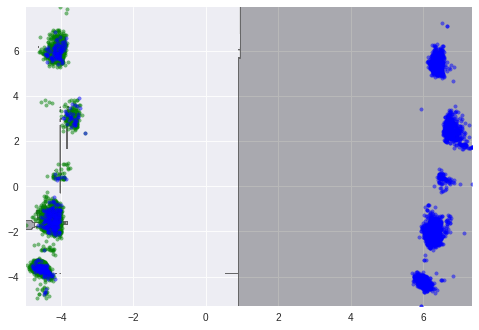

In [65]:
clfs = dict()
clfs_score = dict()

y_train = ActivePension_df.sample(n=10000, random_state=0)['IsPensionPaid'].as_matrix()
X_train = ActivePension_df[x_cols2].sample(n=10000, random_state=0)

X_train = X_train.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.8)

scaling_def = {'QuantileTransformer_n':QuantileTransformer(output_distribution='normal')}
redemensioning_def = {'PCA': PCA(n_components=2)}

for data in map(lambda x:Redimensioning2(x[1],x[0],redemensioning_def), scaling3(X_train,scaling_def)):
  for x in data:
    MLModelBuilding('RandomForestClassifier', x[1], x[0], y_train, 0.3, clfs, [0.1, 1],clfs_score)

for data in map(lambda x:Redimensioning2(x[1],x[0],redemensioning_def), scaling3(X_test,scaling_def)):
  for x in data:
    #if x[1] == 'KPCA PowerTransformer|MinMaxScaler|QuantileTransformer|':
    plot_decision_regions(x[0], y_test, clfs['RandomForestClassifier|PCA QuantileTransformer_n|'])
    #print(x[1])
plt.show()